In [1]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Insert the directory
!ls "/content/drive/My Drive/Colab Notebooks"

'A0201825N - GET1030 Tutorial 3.ipynb'	'Master 2018'
'A0201825N GET1030 Tutorial 4.ipynb'	 networkprocessing.py
'F1 notebook.ipynb'			 __pycache__
 fob					 Shakespeare-completed.ipynb
'GET1030 Fundamentals.ipynb'		 textprocessing.py
'GET1030 Tutorial 2.ipynb'		 Untitled0.ipynb
'GET1030 Wk 8.ipynb'			 Untitled1.ipynb
 harrypotter				 Untitled2.ipynb


In [3]:
import pandas as pd
import seaborn as sns

In [5]:
!python3 "/content/drive/My Drive/Colab Notebooks/networkprocessing.py"

In [9]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [10]:
import networkprocessing as np

In [11]:
np.make_network("/content/drive/My Drive/Colab Notebooks/harrypotter")

Processing /content/drive/My Drive/Colab Notebooks/harrypotter/recent.txt
Processing /content/drive/My Drive/Colab Notebooks/harrypotter/older.txt


In [12]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/harrypotter_analysis/networkInfo.xlsx")
df

,network_id,nodes,edges,avg path length,avg degree,avg weighted degree,diameter,radius,density
0,recent,6,13,1.133333,4.333333,12.000000,2,1,0.866667
1,older,6,12,1.200000,4.000000,6.333333,2,1,0.800000


Based on the above, the nodes in the recent network have higher degree, weighted degree and density values on average as compared to the older network. On the other hand, the recent network has an extra edge as compared to the older network.

In [13]:
df2 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/harrypotter_analysis/nodeInfo.xlsx")
df2

,Unnamed: 0,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
0,0,David Yates,5,15,0.666667,0.066667,1,1.000000,recent
1,1,Michael Goldenberg,3,3,0.000000,0.000000,2,0.714286,recent
2,2,David Heyman,5,15,0.666667,0.066667,1,1.000000,recent
3,3,David Barron,5,15,0.666667,0.066667,1,1.000000,recent
4,4,Steve Kloves,4,12,0.000000,0.000000,2,0.833333,recent
5,5,J. K. Rowling,4,12,0.000000,0.000000,2,0.833333,recent
6,6,Chris Columbus,4,8,0.000000,0.000000,2,0.833333,older
7,7,Steve Kloves,5,10,1.500000,0.150000,1,1.000000,older
8,8,David Heyman,5,10,1.500000,0.150000,1,1.000000,older
9,9,Alfonso Cuarón,4,4,0.000000,0.000000,2,0.833333,older


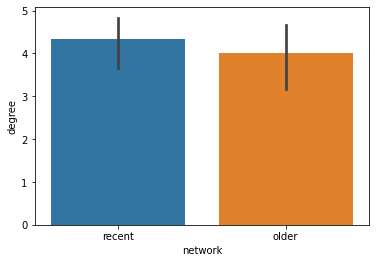

In [14]:
sns.barplot(data=df2, x="network",y="degree")

In [15]:
df2.sort_values(by="closeness",ascending=False)

,Unnamed: 0,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
0,0,David Yates,5,15,0.666667,0.066667,1,1.000000,recent
2,2,David Heyman,5,15,0.666667,0.066667,1,1.000000,recent
3,3,David Barron,5,15,0.666667,0.066667,1,1.000000,recent
7,7,Steve Kloves,5,10,1.500000,0.150000,1,1.000000,older
8,8,David Heyman,5,10,1.500000,0.150000,1,1.000000,older
4,4,Steve Kloves,4,12,0.000000,0.000000,2,0.833333,recent
5,5,J. K. Rowling,4,12,0.000000,0.000000,2,0.833333,recent
6,6,Chris Columbus,4,8,0.000000,0.000000,2,0.833333,older
9,9,Alfonso Cuarón,4,4,0.000000,0.000000,2,0.833333,older
10,10,Mark Radcliffe,4,4,0.000000,0.000000,2,0.833333,older


Based on the above, the node representing Mike Newell (from the older network) has the lowest 'closeness' value of 0.625

In [17]:
older = df2["network"] == "older"
df2.loc[older]

,Unnamed: 0,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
6,6,Chris Columbus,4,8,0.0,0.00,2,0.833333,older
7,7,Steve Kloves,5,10,1.5,0.15,1,1.000000,older
8,8,David Heyman,5,10,1.5,0.15,1,1.000000,older
9,9,Alfonso Cuarón,4,4,0.0,0.00,2,0.833333,older
10,10,Mark Radcliffe,4,4,0.0,0.00,2,0.833333,older
11,11,Mike Newell,2,2,0.0,0.00,2,0.625000,older


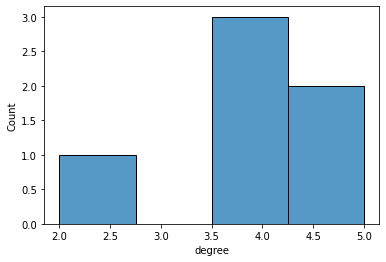

In [18]:
sns.histplot(x="degree", data=df2.loc[older])

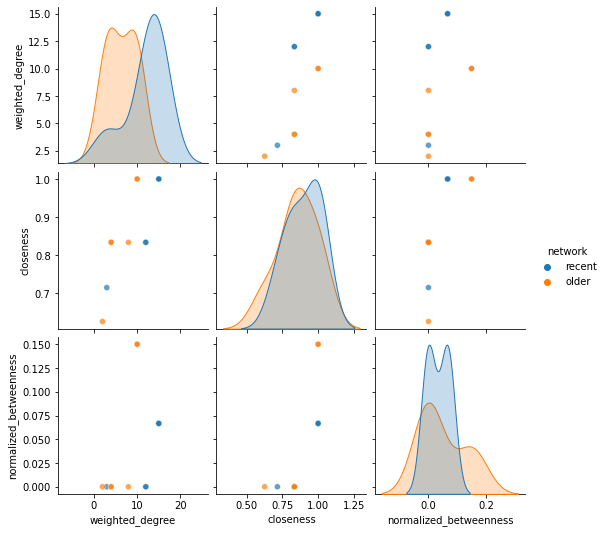

In [19]:
sns.pairplot(df2,vars=["weighted_degree","closeness","normalized_betweenness"],
             hue="network",plot_kws={'alpha': 0.7})

Based on the above, it seems that the spread of weighted degree values is wider in the recent network compared to the older network, meaning that the weighted degree values of the nodes in the older network are more consistent. On the other hand, The spreads of the closeness and normalized betweenness values are wider in the older network, meaning that the corresponding values are less consistent as compared to the recent network. These can be determined from the KDE plots in the pair plot.